In [110]:
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
model = load_model('image_color.h5')

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0

In [112]:
# import glob
# images = glob.glob('C:\\vsCode\\PillProject\\imageT\\color\\test2/*.jpg')

In [113]:
# import numpy as np
# from PIL import Image

# image_list = []
# for image in images:
#     img = Image.open(image)
#     img = img.resize((256, 256))

#     x = np.array(img) # PIL image to NumPy array
#     image_list.append(x)
# image_list

In [114]:
# for image in image_list:
#     img_2 = Image.fromarray(image) # NumPy array to PIL image
#     img_2.show()

In [146]:
from keras.preprocessing.image import ImageDataGenerator
# -------- 테스트용 -------------

# Gen으로 데이터를 생성하려고 하는게아닌 이미지 폴더를 image, label로 분리하고 검증용 데이터를 분리하기 위해서 사용했고
# 또한 사용하면 이미지 사이즈나 클래스 모드를 사용할 수 있기 때문에 사용했습니다.

#  이미지 4장을 한 번에 읽어들이기 위해 batch_size = 4으로 설정
batch_size = 1

# 생성시에 파라미터를 설정하면 어떻게 augmentation를 진행할지 지정할 수 있다.
datagen = ImageDataGenerator(
    featurewise_center = True)

# 경로, 셔플, 이미지사이즈, 한번에 읽어올 이미지 수, 클래스 모드
generator = datagen.flow_from_directory(
    'C:\\vsCode\\PillProject\\imageT\\color\\test2', 
    shuffle = True, 
    target_size=(256,256), 
    batch_size=batch_size, 
    class_mode = 'categorical')

Found 14 images belonging to 5 classes.


In [147]:
# 생성된 총 이미지 개수와 반복문의 실행 수를 계산
n_img = generator.n
steps = n_img // batch_size

# 이미지를 저장할 리스트와 라벨을 저장할 리스트 사용
imgs, labels = [], []
# 반복문의 실행 수 만큼 반복
for i in range(steps):
    # gen으로 데이터를 가져와서 각각의 리스트에 추가
    a, b = generator.next()
    imgs.extend(a)
    labels.extend(b)

# 이미지와 라벨이 실수형으로 되어있기 때문에 정수형으로 변환
test_images = np.asarray(imgs, dtype=np.uint8)
labels = np.asarray(labels, dtype=np.uint8)

print(labels)
# 라벨이 [0,0,1,0,0]이런식으로 되어있기 때문에 [2] 이런식으로 모두 변형
test_labels = []
for i in labels:
    rank = 0
    for ii in i:
        if(ii == 1):
            break
        rank += 1
    list1 = []
    list1.append(rank)
    test_labels.extend(list1)
# 라벨또한 다시 정수형으로 변경
labels = np.asarray(test_labels, dtype=np.uint8)
# 1차원 배열형식으로 되어있어서 2차원 배열로 변경
test_labels = labels[:, np.newaxis]



[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


IndexError: index 14 is out of bounds for axis 0 with size 14

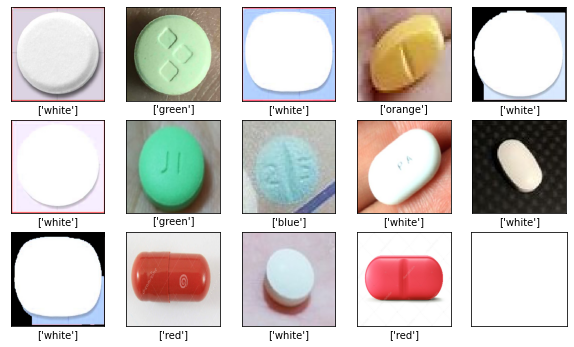

In [148]:
# 이미지들이 라벨에 어떠한 이미지인지 분류가 되어있긴 하나 숫자로만 되어있음
# 클래스의 이름
class_names = ['blue', 'green', 'orange', 'red', 'white']
class_names = np.array(class_names)
# 예시로 보여줄 사진 크기
plt.figure(figsize=(10,10))

# 25장의 이미지만 예시로 보여줄 것
for i in range(25):
    # 5행 5열로 이미지를 보여줌
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # 이미지 보여주기
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    # 이미지마다 이름 보여주기 
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [149]:
class_names = ['blue', 'green', 'orange', 'red', 'white']
class_names = np.array(class_names)

# 테스트 이미지 실수로 변경 (1과 0 사이 값)
test_images = test_images.astype('float32')
test_images = test_images/255

# 분류될 클래스 개수
num_classes = 5

# 라벨들 이진핫코딩 ([0],[0],[0],[0],[1]) 형식
test_labels = utils.to_categorical(test_labels, num_classes)

In [150]:
# 예측
predictions = model.predict(test_images)

1/1 [==============================] - 1s 518ms/step


원본 white | 예측 값 white
원본 green | 예측 값 green
원본 white | 예측 값 white
원본 orange | 예측 값 orange
원본 white | 예측 값 white
원본 white | 예측 값 white
원본 green | 예측 값 green
원본 blue | 예측 값 blue
원본 white | 예측 값 blue
원본 white | 예측 값 green
원본 white | 예측 값 white
원본 red | 예측 값 red
원본 white | 예측 값 blue
원본 red | 예측 값 red


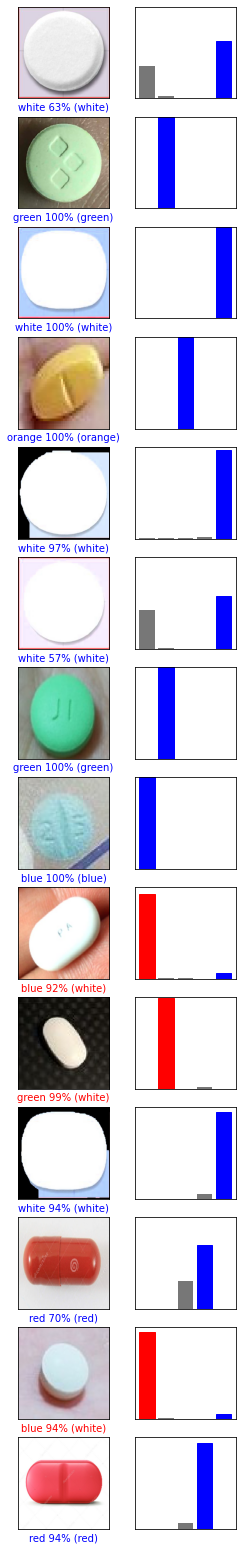

In [152]:
def print_color(number):
    index = 0
    for i in class_names:
        if number == index:
            return i
        index += 1
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    print('원본 {} | 예측 값 {}'.format(print_color(np.argmax(true_label)),print_color(predicted_label)))
    
    if predicted_label == np.argmax(true_label):
        # 테스트 이미지와 모델이 분류한 이미지가 같으면 그래프를 파란색으로
        color = 'blue'
    else:
        # 테스트 이미지와 모델이 분류한 이미지 분류와 다르면 그래프를 빨간색으로
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[np.argmax(true_label)]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

    
num_rows = len(test_images)
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()